In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
dataset = pd.read_csv("covid_19_data.csv", parse_dates = ["Last Update"])
dataset.sample(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
10214,10215,03/23/2020,California,US,2020-03-23 23:19:34,12.0,1.0,0.0
7746,7747,03/22/2020,NaN,Lithuania,2020-03-22 15:13:52,131.0,1.0,1.0
11336,11337,03/23/2020,NaN,Uzbekistan,2020-03-23 23:19:21,46.0,0.0,0.0
3835,3836,03/07/2020,NaN,Israel,2020-03-06 20:33:03,21.0,0.0,2.0
10623,10624,03/23/2020,Oklahoma,US,2020-03-23 23:19:34,0.0,0.0,0.0


In [106]:
dataset.shape

(11341, 8)

In [107]:
dataset.rename(columns = {'ObservationDate' :'Date','Country/Region' : 'Country'}, inplace = True)
print(dataset.columns)


Index(['SNo', 'Date', 'Province/State', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')


In [108]:
dataset.sample(5)

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
5688,5689,03/15/2020,NaN,Estonia,2020-03-15 18:20:18,171.0,0.0,1.0
10569,10570,03/23/2020,California,US,2020-03-23 23:19:34,29.0,1.0,0.0
11322,11323,03/23/2020,NaN,Syria,2020-03-23 23:19:21,1.0,0.0,0.0
3717,3718,03/06/2020,NaN,Gibraltar,2020-03-04 13:03:13,1.0,0.0,0.0
1456,1457,02/14/2020,Macau,Macau,2020-02-13 14:13:06,10.0,0.0,3.0


In [109]:
dataset.dtypes

SNo                        int64
Date                      object
Province/State            object
Country                   object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
dtype: object

In [110]:
dataset.isnull().sum().to_frame('nulls')
df = dataset.groupby(["Date","Country"])[['Date','Country','Confirmed','Deaths','Recovered']].sum().reset_index()
df.head()


,Date,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,0.0,0.0,0.0
1,01/22/2020,Japan,2.0,0.0,0.0
2,01/22/2020,Macau,1.0,0.0,0.0
3,01/22/2020,Mainland China,547.0,17.0,28.0
4,01/22/2020,South Korea,1.0,0.0,0.0


In [111]:
# grouping and Rating Confirmed,Death, recovered
Confirmed_Sorted = df.sort_values('Confirmed',ascending = False)
Confirmed_Sorted = Confirmed_Sorted.drop_duplicates('Country')

Confirmed_cases = Confirmed_Sorted["Confirmed"].sum()
Death_cases = Confirmed_Sorted["Deaths"].sum()
Recovered_cases = Confirmed_Sorted["Recovered"].sum()

World_Death_rate = ((Death_cases * 100 )/ Confirmed_cases)
World_Recovery_rate = ((Recovered_cases * 100)/Confirmed_cases)

Active = Confirmed_cases - Death_cases-Recovered_cases

China = Confirmed_Sorted[Confirmed_Sorted["Country"] == "Mainland China"]
China_recovered_rate = (int(China["Recovered"].values)*100)/int(China["Confirmed"].values)


In [112]:
Detail = {"Total Confirmed cases in the World" : Confirmed_cases,
          "Total Death Cases in the world" : Death_cases,
          "Totally Recovered cases in the World" : Recovered_cases,
          "Active" : Active,
          "Rate of Death cases %" : World_Death_rate,
          "Rate of Recovery Rate %" : World_Recovery_rate,
          "Rate of China_recovered_cases %": China_recovered_rate
          }
op = pd.DataFrame.from_dict(Detail,orient = 'index',columns = ["Total"])
op.style.background_gradient(cmap = "RED")
print(op)


                                              Total
Total Confirmed cases in the World    378566.000000
Total Death Cases in the world         16496.000000
Totally Recovered cases in the World  100721.000000
Active                                261349.000000
Rate of Death cases %                      4.357496
Rate of Recovery Rate %                   26.605929
Rate of China_recovered_cases %           89.635830


In [113]:
case_per_day = df.groupby(["Date"])[["Confirmed","Deaths","Recovered"]].sum().reset_index()
Confirmed_cases_1 = case_per_day.sort_values("Date",ascending =False)

x = case_per_day.index

y1 = case_per_day.Confirmed
y2 = case_per_day.Deaths
y3 = case_per_day.Recovered


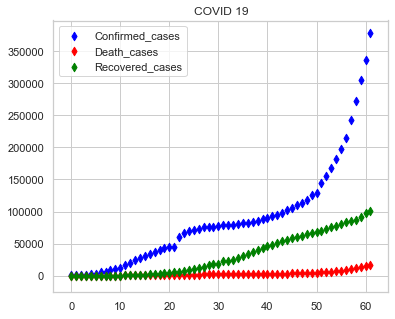

In [114]:
# visualizing death,recoveryy, confrimed case
sns.set(style = "whitegrid")
f,ax = plt.subplots(figsize =(6,5))

plt.scatter(x,y1,color = "Blue",label = "Confirmed_cases", marker = "d")
plt.scatter(x,y2,color = "red", label = "Death_cases",marker = "d")
plt.scatter(x,y3,color = "green", label = "Recovered_cases",marker = "d")
plt.title("COVID 19")
plt.legend(loc = "upper left", frameon = True)
plt.show()


In [115]:
#stats on the confirmed cases across the world up to 23-03-2020

df_date = dataset.groupby(["Date","Country"])[["Date","Country","Confirmed","Deaths"]].sum().reset_index()
sort_diff_date = df_date.sort_values("Country",ascending = False)

x1 = sort_diff_date[sort_diff_date.Date == '03/23/2020'].reset_index().drop('index',axis = 1)
x2 = sort_diff_date[sort_diff_date.Date == '03/22/2020'].reset_index().drop('index',axis = 1)

h = pd.merge(x2, x1,on = "Country")

h["New Confirmed Cases"] = h["Confirmed_y"]-h["Confirmed_x"]
h["New Death cases"] = h["Deaths_y"]-h["Deaths_x"]

h1 = h.sort_values('New Confirmed Cases', ascending = False).head(50)
h1 = h1.drop(["Confirmed_y","Confirmed_x","Deaths_y","Deaths_x","Date_x"],axis = 1)

print("New confirmed cases in 23/03/2020")
print(h1)


New confirmed cases in 23/03/2020
                  Country      Date_y  New Confirmed Cases  New Death cases
9                      US  03/23/2020              10391.0            135.0
25                  Spain  03/23/2020               6368.0            539.0
91                  Italy  03/23/2020               4789.0            601.0
110               Germany  03/23/2020               4183.0             29.0
113                France  03/23/2020               4079.0            188.0
20            Switzerland  03/23/2020               1550.0             22.0
95                   Iran  03/23/2020               1411.0            127.0
157               Austria  03/23/2020               1230.0              5.0
10                     UK  03/23/2020                985.0             54.0
139                Canada  03/23/2020                623.0              4.0
59            Netherlands  03/23/2020                548.0             34.0
43               Portugal  03/23/2020                4

##  COVID-19 tendency in China 
Since China was the initial infected country, the COVID-19 behavior is different from the rest of the world. The medical system was not prepared for the pandemic, in fact no one was aware of the virus until several cases were reported. Moreover, China government took strong contention measures in a considerable short period of time and, while the virus is widely spread, they have been able to control the increasing of the infections.

Text(0.5, 0, 'Date')

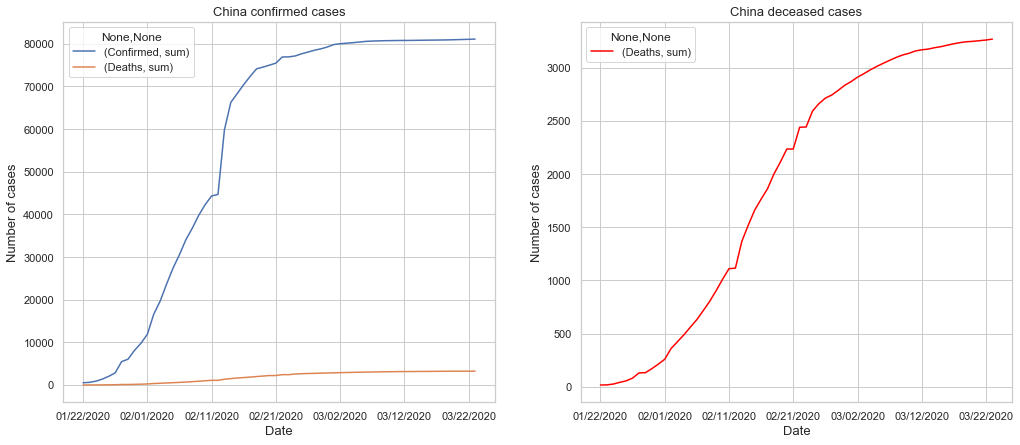

In [116]:

confirmed_total_date_China = df[df['Country']=='Mainland China'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_China = df[df['Country']=='Mainland China'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date_China.plot(ax=ax2, color='Red')
ax2.set_title("China deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

## COVID-19 tendency in US

Text(0.5, 0, 'Date')

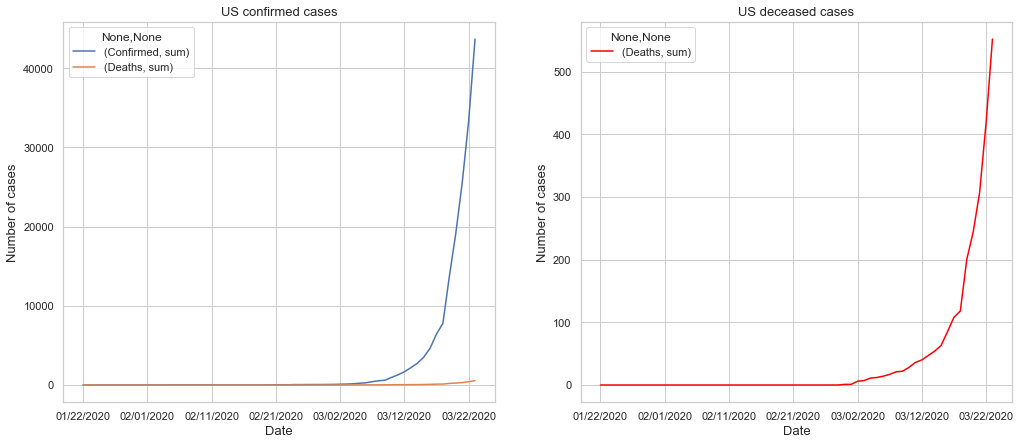

In [117]:
confirmed_total_date_US = df[df['Country']=='US'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_US = df[df['Country']=='US'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_US = confirmed_total_date_US.join(fatalities_total_date_US)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_US.plot(ax=ax1)
ax1.set_title("US confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date_US.plot(ax=ax2, color='Red')
ax2.set_title("US deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

## COVID-19 tendency in INDIA

Text(0.5, 0, 'Date')

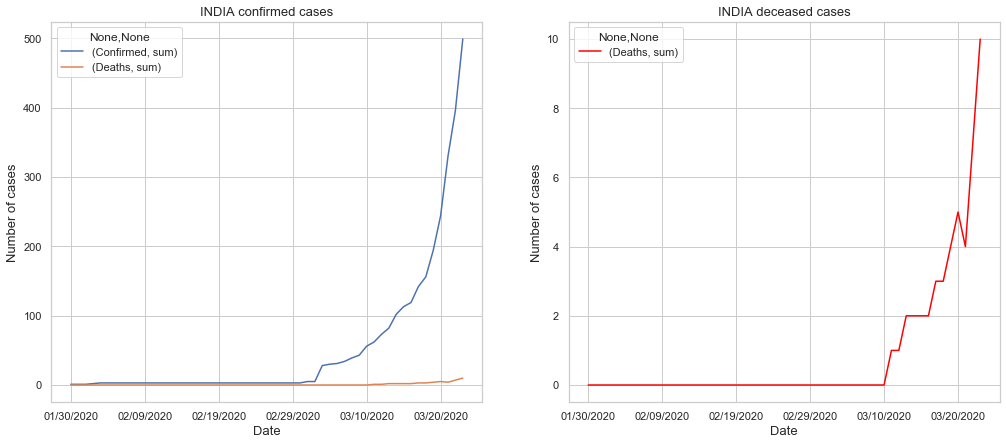

In [118]:
confirmed_total_date_India = df[df['Country']=='India'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_India = df[df['Country']=='India'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_India = confirmed_total_date_India.join(fatalities_total_date_India)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_India.plot(ax=ax1)
ax1.set_title("INDIA confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date_India.plot(ax=ax2, color='Red')
ax2.set_title("INDIA deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

## Italy, Spain, UK and Singapore 
Both Italy and Spain are experiencing the larger increase in COVID-19 positives in Europe. At the same time, UK is a unique case given that it's one of the most important countries in Europe but recently has left the European Union, which has create an effective barrier to human mobility from other countries. The fourth country we will study in this section is Singapore, since it's an asiatic island, is closer to China and its socio-economic conditions is different from the other three countries.

In [119]:
# confirmed cases in Italy
confirmed_total_date_Italy = df[df['Country']=='Italy'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Italy = df[df['Country']=='Italy'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#confirmed cases in Spain
confirmed_total_date_Spain = df[df['Country']=='Spain'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Spain = df[df['Country']=='Spain'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)

#confirmed cases in UK
confirmed_total_date_UK = df[df['Country']=='UK'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_UK = df[df['Country']=='UK'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_UK = confirmed_total_date_UK.join(fatalities_total_date_UK)

#confirmed cases in Singapore
confirmed_total_date_Singapore = df[df['Country']=='Singapore'].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Singapore = df[df['Country']=='Singapore'].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)

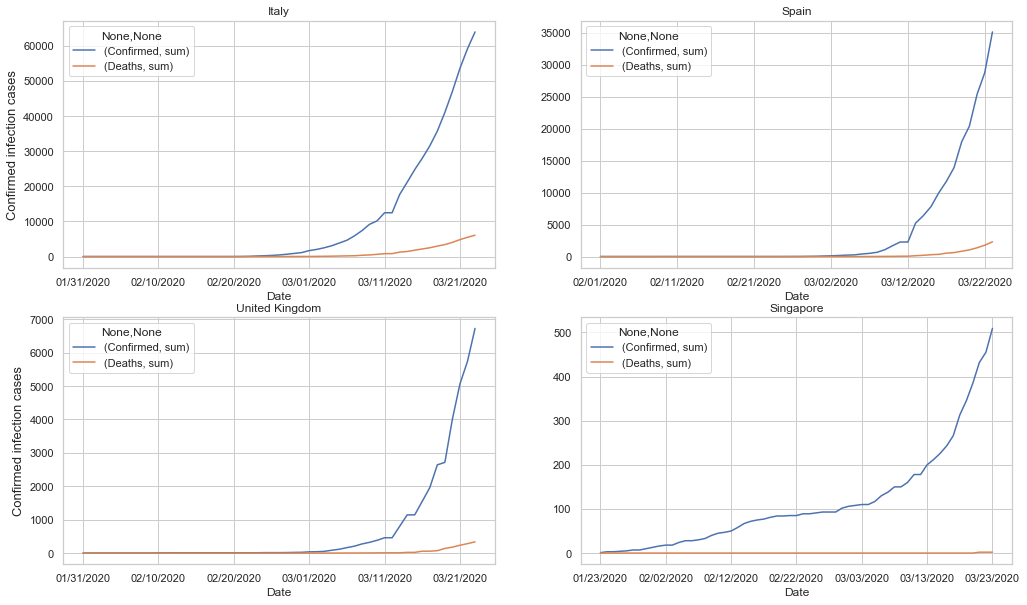

In [120]:
plt.figure(figsize=(17,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_UK.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 4)
total_date_Singapore.plot(ax=plt.gca(), title='Singapore')

In [121]:
# Evolution of the infections from the first confirmed case in ITALY
confirmed_total_date_Italy = df[(df['Country']=='Italy') & df['Confirmed']!=0].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Italy = df[(df['Country']=='Italy') & df['Confirmed']!=0].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

# Evolution of the infections from the first confirmed case in SPAIN
confirmed_total_date_Spain = df[(df['Country']=='Spain') & (df['Confirmed']!=0)].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Spain = df[(df['Country']=='Spain') & (df['Confirmed']!=0)].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)
                                     
# Evolution of the infections from the first confirmed case in UK
confirmed_total_date_UK = df[(df['Country']=='UK') & (df['Confirmed']!=0)].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_UK = df[(df['Country']=='UK') & (df['Confirmed']!=0)].groupby(['Date']).agg({'Deaths':['sum']})
total_date_UK = confirmed_total_date_UK.join(fatalities_total_date_UK)

# Evolution of the infections from the first confirmed case in SINGAPORE
confirmed_total_date_Singapore = df[(df['Country']=='Singapore') & (df['Confirmed']!=0)].groupby(['Date']).agg({'Confirmed':['sum']})
fatalities_total_date_Singapore = df[(df['Country']=='Singapore') & (df['Confirmed']!=0)].groupby(['Date']).agg({'Deaths':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)

italy = [i for i in total_date_Italy.Confirmed['sum'].values]
italy_30 = italy[0:70] 
spain = [i for i in total_date_Spain.Confirmed['sum'].values]
spain_30 = spain[0:70] 
UK = [i for i in total_date_UK.Confirmed['sum'].values]
UK_30 = UK[0:70] 
singapore = [i for i in total_date_Singapore.Confirmed['sum'].values]
singapore_30 = singapore[0:70] 


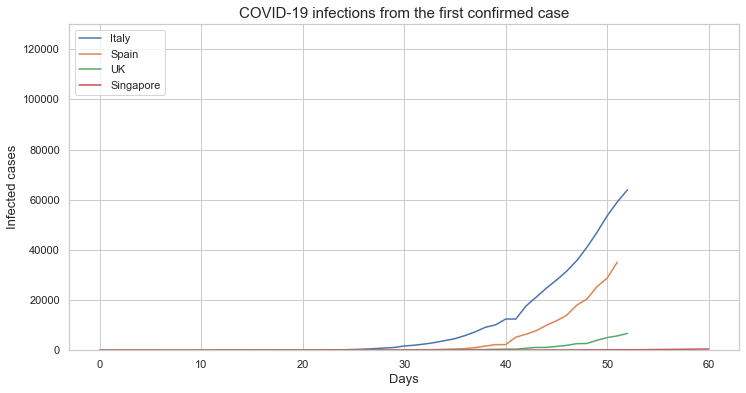

In [122]:
# Plots
plt.figure(figsize=(12,6))
plt.plot(italy_30)
plt.plot(spain_30)
plt.plot(UK_30)
plt.plot(singapore_30)
plt.legend(["Italy", "Spain", "UK", "Singapore"], loc='upper left')
plt.title("COVID-19 infections from the first confirmed case", size=15)
plt.xlabel("Days", size=13)
plt.ylabel("Infected cases", size=13)
plt.ylim(0, 130000)
plt.show()

In [123]:
df_date = dataset.groupby(["Date","Country"])[["Date","Country","Confirmed","Deaths"]].sum().reset_index()
sort_diff_date = df_date.sort_values("Country",ascending = False)

x1 = sort_diff_date[sort_diff_date.Date == '03/23/2020'].reset_index().drop('index',axis = 1)
x2 = sort_diff_date[sort_diff_date.Date == '03/22/2020'].reset_index().drop('index',axis = 1)

h = pd.merge(x2, x1,on = "Country")

h["New Confirmed Cases"] = h["Confirmed_y"]-h["Confirmed_x"]
h["New Death cases"] = h["Deaths_y"]-h["Deaths_x"]

h1 = h.sort_values('New Confirmed Cases', ascending = False).head(50)
h1 = h1.drop(["Confirmed_y","Confirmed_x","Deaths_y","Deaths_x","Date_x"],axis = 1)

print("New confirmed cases in 23/03/2020")
print(h1)


New confirmed cases in 23/03/2020
                  Country      Date_y  New Confirmed Cases  New Death cases
9                      US  03/23/2020              10391.0            135.0
25                  Spain  03/23/2020               6368.0            539.0
91                  Italy  03/23/2020               4789.0            601.0
110               Germany  03/23/2020               4183.0             29.0
113                France  03/23/2020               4079.0            188.0
20            Switzerland  03/23/2020               1550.0             22.0
95                   Iran  03/23/2020               1411.0            127.0
157               Austria  03/23/2020               1230.0              5.0
10                     UK  03/23/2020                985.0             54.0
139                Canada  03/23/2020                623.0              4.0
59            Netherlands  03/23/2020                548.0             34.0
43               Portugal  03/23/2020                4

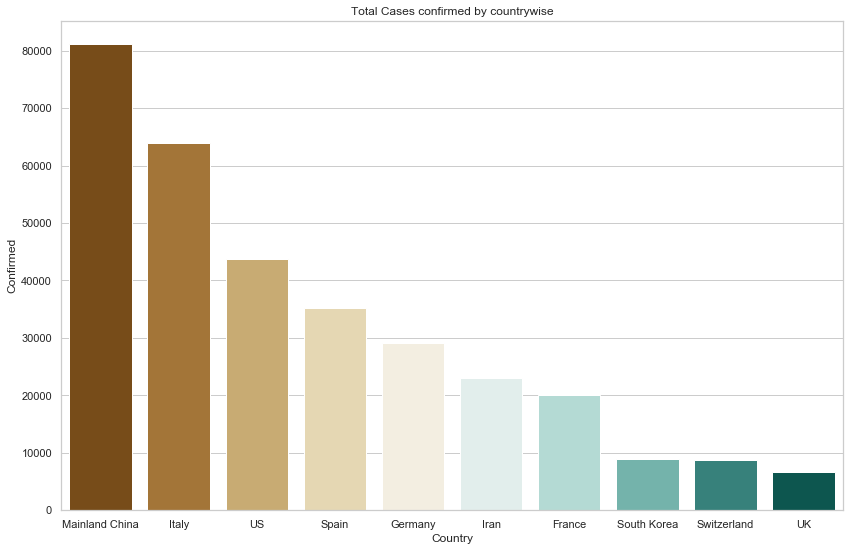

In [124]:
#plotting Total cases Confirmed Countrywise
sort_by_confirmed = Confirmed_Sorted.head(10)
x = sort_by_confirmed.Country
y = sort_by_confirmed.Confirmed
plt.figure(figsize = (14,9))
sns.barplot(x,y ,order =x, palette = "BrBG").set_title("Total Cases confirmed by countrywise")
plt.show()


In [125]:
x_data = pd.DataFrame(case_per_day.index)
y_data = pd.DataFrame(case_per_day.Confirmed)


In [126]:
#Splitting train & test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.1,random_state = 0)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [127]:
#Polynomial features
Poly_re = PolynomialFeatures(degree = 5)
x_poly = Poly_re.fit_transform(X_train)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)

x3 = case_per_day.index
x4 = case_per_day.Confirmed


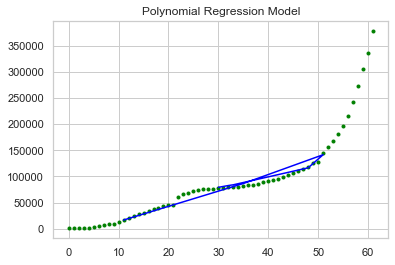

In [128]:
#Visualizing
plt.scatter(x3,x4, color = "Green",marker = ".")
plt.plot(X_test,lin_reg2.predict(Poly_re.fit_transform(X_test)),color = "blue")
plt.title("Polynomial Regression Model")
plt.show()


In [129]:
#Predicting
y_pred = lin_reg2.predict(Poly_re.fit_transform(X_test))


In [130]:
# R2 Score 
from sklearn.metrics import r2_score
print("Polynomial Regression ",r2_score(y_test,y_pred))


Polynomial Regression  0.9916275763956475


In [131]:
#Future Prediction
print("After {0} day will be {1} case in the world".format((63-len(case_per_day)),lin_reg2.predict(Poly_re.fit_transform([[63]]))))


After 1 day will be [[466358.22782463]] case in the world
